In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_model=VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3))
for layer in base_model.layers:
 layer.trainable = False

model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['Accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255.0,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(1/255.0)

In [20]:
!cp -r '/content/drive/MyDrive/Deep_Learning/chest_xray' '/content'

In [23]:
train_generator=train_datagen.flow_from_directory('/content/chest_xray/train',target_size=(224,224),class_mode='binary',batch_size=32)
val_generator=val_datagen.flow_from_directory('/content/chest_xray/val',target_size=(224,224),class_mode='binary',batch_size=32)

Found 5218 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


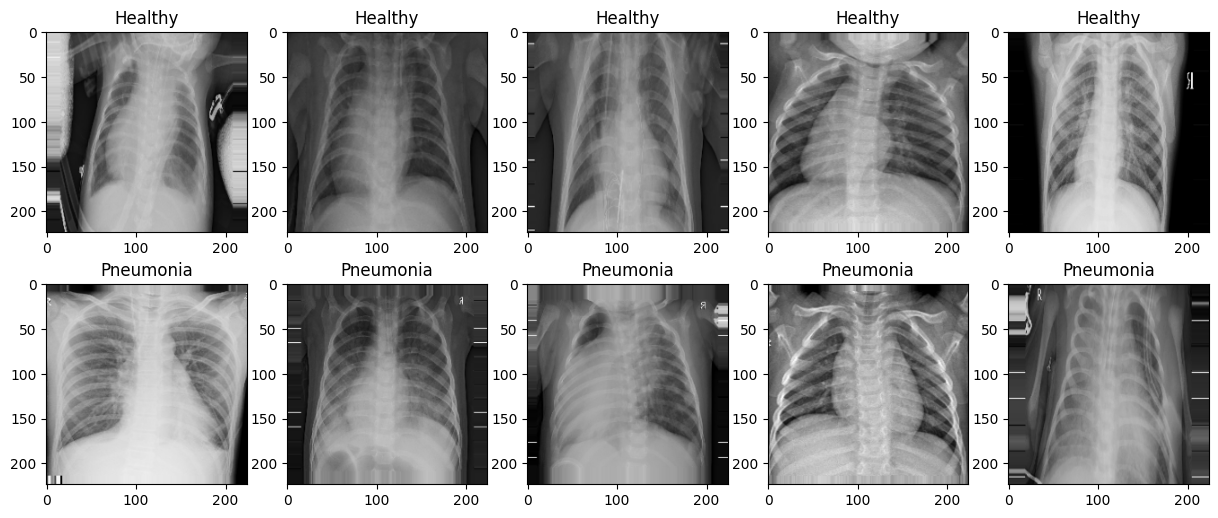

In [30]:
num_images_to_display = 5
healthy_img, _ = next(train_generator)
pneumonia_img, _ = next(train_generator)
plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(healthy_img[i])
    plt.title("Healthy")

    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(pneumonia_img[i])
    plt.title("Pneumonia")

In [31]:
# Train the model
history=model.fit(train_generator, epochs=10, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - Accuracy: 0.8305 - loss: 3.1050

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


164/164 ━━━━━━━━━━━━━━━━━━━━ 138s 740ms/step - Accuracy: 0.8310 - loss: 3.0915 - val_Accuracy: 0.8750 - val_loss: 2.5021
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 109s 667ms/step - Accuracy: 0.9616 - loss: 0.1007 - val_Accuracy: 0.8125 - val_loss: 5.9023
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 110s 668ms/step - Accuracy: 0.9660 - loss: 0.1012 - val_Accuracy: 0.6875 - val_loss: 16.7994
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 109s 665ms/step - Accuracy: 0.9684 - loss: 0.0895 - val_Accuracy: 0.8125 - val_loss: 4.6865
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 142s 665ms/step - Accuracy: 0.9657 - loss: 0.0890 - val_Accuracy: 0.8125 - val_loss: 5.9932
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 110s 667ms/step - Accuracy: 0.9688 - loss: 0.0857 - val_Accuracy: 0.7500 - val_loss: 30.9322
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 109s 662ms/step - Accuracy: 0.9753 - loss: 0.0672 - val_Accuracy: 0.6250 - val_loss: 35.5628
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 109s 667ms/step - Accuracy: 0.9743 - loss: 0

In [60]:
from tensorflow.keras.preprocessing import image
def predict_image(image_path, model, image_size=(224, 224)):
    img = image.load_img(image_path, target_size=image_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize

    prediction = model.predict(img)
    return "Normal" if prediction < 0.5 else "Pneumonia"


In [61]:
img = '/content/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg'

In [62]:
predict_image(img,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'Pneumonia'

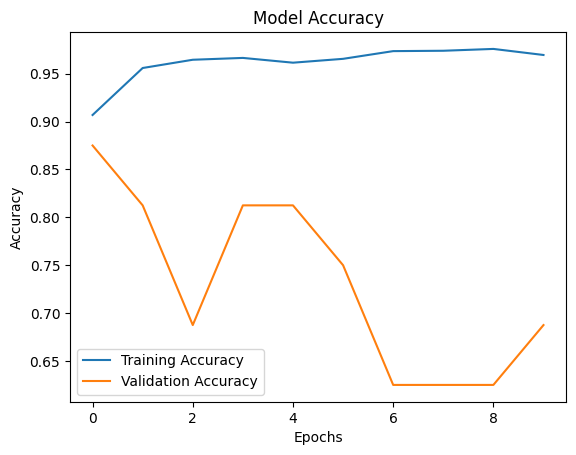

In [65]:
# Plotting training accuracy
plt.plot(history.history['Accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

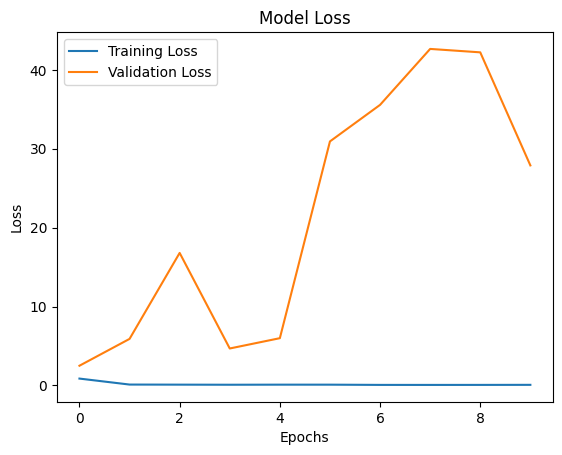

In [66]:
plt.plot(history.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()